Git Bisect
====================

According to [git documentation page](https://git-scm.com/docs/git-bisect), ``git bisect`` is a command that:

> ... uses a binary algorithm to find which commit in your project's history introduced a bug.

## What's Git Bisect for?
A common scenario in software development is when a developer commits to a repository and it adds something that breaks the application (or even the automated tests). It's also common to spend some time searching for what added that broken code to the repository. Usually, developers look for a commit where the application was working as expected and go commit by commit running tests to check which one broke the application but this approach can take some time. Better results can be obtained using ``git bisect``.

In [9]:
from IPython.display import YouTubeVideo

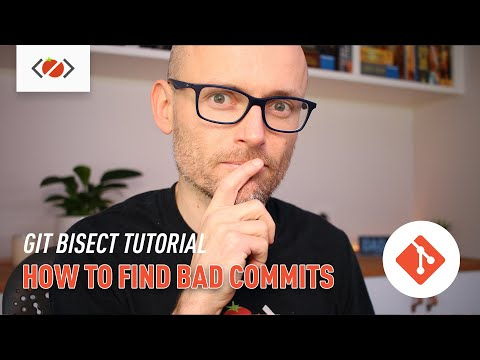

In [10]:
YouTubeVideo('D7JJnLFOn4A')

## Hands On

As seen on video, it's possible to run git bisect commands manually. Let's try these commands. First of all, clone this repository:

    git clone https://github.com/fehaa/git-bisect-tutorial.git
    
You'll see that this repository isn't working as expected if you run ``python factorial`` from root folder and enter a number (it's always returning zero):

![](../assets/git_bisect/git_bisect_factorial.png)

So, you'll execute these commands:

    git bisect start 		// Start Bisecting
    git bisect bad			// Current version is bad
    git bisect good 58ecb3e 	// Commit 58ecb3e is known to be good
    
![](../assets/git_bisect/git_bisect_factorial_step_0.png)
    
    python factorial.py 5	// Runs our Python factorial script passing 5 as an argument
	git bisect good		// It's working correctly
    
![](../assets/git_bisect/git_bisect_factorial_step_1.png)    

    python factorial.py 	// Runs our script again without an argument because it's not necessary in this revision
    git bisect bad 		// It's **not** working correctly
    
![](../assets/git_bisect/git_bisect_factorial_step_2.png)

    python factorial.py
    git bisect bad 		// It's **not** working correctly
    
![](../assets/git_bisect/git_bisect_factorial_step_3.png)

    python factorial.py 
    git bisect good 	// It's working correctly in this revision
    
![](../assets/git_bisect/git_bisect_factorial_step_4.png)

    git bisect reset 	// We've found which revision was wrong, now we clean up the bisection and return to the original HEAD

![](../assets/git_bisect/git_bisect_factorial_step_5.png)

Basically, all of these commands can be summarized in this flowchart:

![](../assets/git_bisect/git_bisect_flowchart.png)

## Automated tests with git bisect run

Using ``git bisect run`` allows you to write scripts that can check for errors automatically. You'll have to create a script and pass it as an argument:

    git bisect run ./script.sh
    
More detailed information is available [here](https://goiabada.blog/git-tricks-debugging-with-git-bisect-78f72807436f#3309).

## Exercise

Create a script to automatize the process described in ``Hands On`` section.

## References

 - [Git documentation](https://git-scm.com/docs)
 - [Git tricks: Debugging with git bisect](https://goiabada.blog/git-tricks-debugging-with-git-bisect-78f72807436f)